In [6]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

np.random.seed(1)
vectorDim = 100

numNode = 100

inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')

'''
print(inputDataTraining.shape)
print(outputDataTraining.shape)

print(inputDataTraining[0])
print(outputDataTraining[0])
''''''

(1526309, 100)
(1526309, 100)
[-0.02351735 -0.21580668 -0.07746142  0.30616015 -0.50626165 -0.53465641
  0.22412315  0.10216704 -0.08972006  0.58413774  0.00719666  0.04281679
 -0.04429427 -0.24588124 -0.10614253  0.24597004  0.28822556 -0.17354693
  0.45586234 -0.18948703  0.24950223  0.57639349  0.47091386  0.40734819
 -0.07026971 -0.65928608  0.38434535 -0.97489905  0.03441016  0.26392755
  0.11954903  0.38285953  0.73950714  0.4763189   0.12021329 -0.28063941
  0.09184753 -0.09080368 -0.47693256 -0.32190481  0.17100073  0.45228553
 -0.60164648  0.30710736  0.10648603 -0.41401032 -0.40083888  0.54358643
 -0.26714236 -0.07415126  0.43052375 -0.02430673 -0.63350528 -0.05007789
  0.18112977 -0.63580644  0.31671059  0.83651656 -0.85935009  0.15473612
 -0.62863618  0.08247093 -0.47696397  0.13628498  0.95557594 -0.95485455
 -0.68352073  0.0123837  -0.01202986 -0.67577863  0.29987732  0.10498992
 -1.09432471 -0.31625351  0.00596754 -0.11741146  0.00311201 -0.34178552
  0.03537211  0.48853

In [7]:
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=False)
#esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.05, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [8]:
esn.fit(inputDataTraining, outputDataTraining, transientTime="Auto", verbose=1)

100% (1526210 of 1526210) |##############| Elapsed Time: 0:00:54 Time:  0:00:54


0.06841102701840343

In [9]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

#discourse_words = ['peanut', 'woman', 'saw', 'dancing', 'peanut', 'big', 'smile', 'his', 'face', 'peanut', 'singing', 'girl', 'just', 'met', 'judging', 'song', 'peanut', 'totally', 'crazy', 'her', 'woman', 'thought', 'really', 'cute', 'see', 'peanut', 'singing', 'dancing', 'peanut']
discourse_words = ['peanuts', 'snacks', 'bowl', 'bar', 'people', 'eating', 'chips', 'drinking', 'beer', 'watching', 'football', 'game', 'woman', 'saw', 'dancing', 'peanut', 'big', 'smile', 'his', 'face', 'peanut', 'singing', 'girl', 'just', 'met', 'judging', 'song', 'peanut', 'totally', 'crazy', 'her', 'woman', 'thought', 'really', 'cute', 'see', 'peanut', 'singing', 'dancing', 'peanut']
print(discourse_words)

['peanuts', 'snacks', 'bowl', 'bar', 'people', 'eating', 'chips', 'drinking', 'beer', 'watching', 'football', 'game', 'woman', 'saw', 'dancing', 'peanut', 'big', 'smile', 'his', 'face', 'peanut', 'singing', 'girl', 'just', 'met', 'judging', 'song', 'peanut', 'totally', 'crazy', 'her', 'woman', 'thought', 'really', 'cute', 'see', 'peanut', 'singing', 'dancing', 'peanut']


In [10]:
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)

for num in range(len(discourse_words)):
    inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
print(inputDataTesting.shape)

(0, 100)
(40, 100)


In [11]:
prediction = esn.predict(inputDataTesting)
#print(prediction)
print(prediction.shape)

(40, 100)


In [12]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


accuracy_trajectory = np.array([])

for num in range(len(discourse_words)):
    #print(discourse_words[num])
    if num == 0:
        discourse_vector4trajectory = wiki2vec.get_word_vector(discourse_words[num])
    else:
        discourse_vector4trajectory = (num * discourse_vector4trajectory + wiki2vec.get_word_vector(discourse_words[num])) / (num + 1)
    accuracy_trajectory = np.append(accuracy_trajectory, cos_sim(discourse_vector4trajectory, prediction[num]))
print(accuracy_trajectory)

[0.57851908 0.66425371 0.72951539 0.76468353 0.79772415 0.84062296
 0.85539531 0.86801684 0.88030313 0.88047699 0.87954655 0.89149036
 0.89954159 0.89976375 0.90571927 0.91770126 0.9174908  0.91113495
 0.90213749 0.90415279 0.92365104 0.91640751 0.91241582 0.90644827
 0.90358012 0.90317002 0.90290133 0.92376863 0.90945512 0.91698872
 0.90751064 0.90720859 0.90047998 0.90559771 0.90928692 0.90079037
 0.92990363 0.9290571  0.92978741 0.94388407]


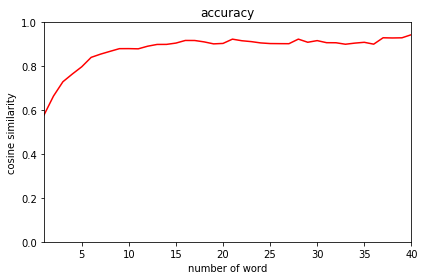

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
t = np.linspace(1, len(discourse_words), len(discourse_words))

ax.set_xlabel('number of word')
ax.set_ylabel('cosine similarity')
ax.set_title(r'accuracy')
ax.set_xlim([1,len(discourse_words)])
ax.set_ylim([0, 1])

ax.plot(t, accuracy_trajectory, color="red")

#ax.legend(loc=0)
fig.tight_layout()
plt.savefig('accuracy_trajectory.png')
plt.show()